<a href="https://colab.research.google.com/github/drtophop/CASAML-Thesis/blob/main/CAS_AML_Thesis_NguyenHop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAS AML Thesis

## Introduction

### Scope

### Contents

### Sources

### Remarks

## Libraries and Modules

In [1]:
import numpy as np

In [2]:
import os
import  time, random
import pandas as pd

In [3]:
pip install pytorch-lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.6/720.6 kB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 21.6 MB/s eta 0:00:00


In [4]:
import torch

from torch import nn
from torch.utils.data import Dataset, DataLoader, random_split
from torch.functional import F
from torchvision import transforms

import pytorch_lightning as pl

from sklearn.model_selection import train_test_split

print(torch.cuda.is_available())

True


In [5]:
from IPython import display
from IPython.display import clear_output
from pathlib import Path

In [6]:
import yaml

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import skimage.io
import imageio.v3 as iio

from PIL import Image

from pathlib import Path


In [8]:
import glob
import io
import cv2
import json

In [9]:
import shutil
from tqdm.auto import tqdm

#### Numpy

#### Opendatasets

The opendatasets Python package, provides a convenient way to download and work with open datasets from various sources

In [10]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import opendatasets as od

## Datasets

#### Inititals Folders

In [12]:
from IPython.display import HTML, display


# set path containing data folder or use default for Colab (/gdrive/My Drive)
local_folder = '/gdrive/My Drive/Colab Notebooks/Thesis';


import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/guiwitz/MLCV/main/notebooks/check_colab.py', 'check_colab.py')
from check_colab import set_datapath
colab, datapath = set_datapath(local_folder)

Mounted at /gdrive


In [13]:
path_main = os.getcwd()

##### Local Folders

In [14]:
# Prepare the String for the detection dataset folder
path_yoloset = f'{path_main}/car-object-detection/data'

##### Clear folders

Before starting with the Yolov5, existing contents and existing folders from a potentional former execution of this Notebook will be cleared to show proper execution, by following expressions

In [15]:
dirs_to_delete = ['car-object-detection', 'yolov5', 'test', 'tmp', 'train', 'valid', 'yolov5_train']

for dir_to_delete in dirs_to_delete:
    path_del = os.path.join(path_main, dir_to_delete)
    if os.path.exists(path_del):
        shutil.rmtree(path_del)

files_to_delete = ['data.yaml','yolov5m6.pt']

for file_to_delete in files_to_delete:
    file_del = os.path.join(path_main, file_to_delete)
    if os.path.exists(file_del):
        os.remove(file_del)


dirs_to_delete = ['carvana-image-masking-png']

for dir_to_delete in dirs_to_delete:
    path_del = os.path.join(path_main, dir_to_delete)
    if os.path.exists(path_del):
        shutil.rmtree(path_del)

### Object Recognition

In [16]:
od.download('https://www.kaggle.com/datasets/sshikamaru/car-object-detection/download?datasetVersionNumber=2')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: drtophop
Your Kaggle Key: ··········


100%|██████████| 112M/112M [00:08<00:00, 14.6MB/s]


### Object Segmentation

In [17]:
od.download('https://www.kaggle.com/datasets/ipythonx/carvana-image-masking-png/download?datasetVersionNumber=1')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: drtophop
Your Kaggle Key: ··········


100%|██████████| 828M/828M [00:51<00:00, 16.7MB/s]


## Yolov5 Object Recoginition

### Clone and Setup Yolo V5

In [18]:
# Clone yolov5 from the corresponding Git Repository to Local
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15978, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 15978 (delta 89), reused 110 (delta 70), pack-reused 15831
Receiving objects: 100% (15978/15978), 14.54 MiB | 8.49 MiB/s, done.
Resolving deltas: 100% (10963/10963), done.


In [19]:
# Install the required Python packages specified in the requirements.txt file within the yolov5 directory
!pip install -qr yolov5/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.6/599.6 kB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.9 MB/s eta 0:00:00


### Initialization

Set up the Hyperparameters to run yolov5

In [20]:
PROJECT_NAME = "yolov5_train"
BASE_MODEL = "yolov5m6.pt"
TRAIN_BATCH = 32
TRAIN_EPOCHS = 20
VAL_BATCH = 64


# Doublecheck if needed Folders are ok
print(f'does path_main exist: {os.path.exists(path_main)}')
print(f'does path_yoloset exist: {os.path.exists(path_yoloset)}')

does path_main exist: True
does path_yoloset exist: True


In [21]:
img_h, img_w, num_channels = (380, 676, 3)

df = pd.read_csv(f'{path_yoloset}/train_solution_bounding_boxes (1).csv')

df.rename(columns={'image':'image_id'}, inplace=True)
df['image_id'] = df['image_id'].apply(lambda x: x.split('.')[0])
df['x_center'] = (df['xmin'] + df['xmax'])/2
df['y_center'] = (df['ymin'] + df['ymax'])/2
df['w'] = df['xmax'] - df['xmin']
df['h'] = df['ymax'] - df['ymin']
df['classes'] = 0
df['x_center'] = df['x_center']/img_w
df['w'] = df['w']/img_w
df['y_center'] = df['y_center']/img_h
df['h'] = df['h']/img_h
df.head()


image_id        xmin        ymin        xmax        ymax  x_center  \
0   vid_4_1000  281.259045  187.035071  327.727931  223.225547  0.450434   
1  vid_4_10000   15.163531  187.035071  120.329957  236.430180  0.100217   
2  vid_4_10040  239.192475  176.764801  361.968162  236.430180  0.444645   
3  vid_4_10020  496.483358  172.363256  630.020260  231.539575  0.833213   
4  vid_4_10060   16.630970  186.546010  132.558611  238.386422  0.110347   

   y_center         w         h  classes  
0  0.539817  0.068741  0.095238        0  
1  0.557191  0.155572  0.129987        0  
2  0.543678  0.181621  0.157014        0  
3  0.531451  0.197540  0.155727        0  
4  0.559122  0.171491  0.136422        0

In [22]:
index = list(set(df.image_id))
image = random.choice(index)
print("Image ID: %s"%(image))

img = cv2.imread(f'{path_yoloset}/training_images/{image}.jpg')
img.shape

Image ID: vid_4_3200


(380, 676, 3)

In [23]:
#adde here cose

In [24]:
source = 'training_images'

for name, mini in tqdm(df.groupby('image_id')):
    if not os.path.exists(os.path.join(path_main, 'tmp', 'labels')):
        os.makedirs(os.path.join(path_main, 'tmp', 'labels'))

    with open(os.path.join(path_main, 'tmp', 'labels', '{}.txt'.format(name)), 'w+') as f:
        row = mini[['classes', 'x_center', 'y_center', 'w', 'h']].astype(float).values
        row = row.astype(str)
        for j in range(len(row)):
            text = ' '.join(row[j])
            f.write(text)
            f.write("\n")

    if not os.path.exists(os.path.join(path_main, 'tmp', 'images')):
        os.makedirs(os.path.join(path_main, 'tmp', 'images'))

    shutil.copy(
        os.path.join(path_yoloset, source, '{}.jpg'.format(name)),
        os.path.join(path_main, 'tmp', 'images', '{}.jpg'.format(name)))

  0%|          | 0/355 [00:00<?, ?it/s]

In [25]:
IMAGES_PATH = f'{path_main}/tmp/images/'
LABELS_PATH = f'{path_main}/tmp/labels/'
os.path.exists(IMAGES_PATH)

True

In [26]:
# Read labels
labels = os.listdir(LABELS_PATH)


# Split data
train, test = train_test_split(labels, test_size=0.15, shuffle=True)
valid, test = train_test_split(test, test_size=0.2)

print(f"train: {len(train)}; valid: {len(valid)}; test: {len(test)}")

train: 301; valid: 43; test: 11


In [27]:
os.makedirs(f'{path_main}/test/images')
os.makedirs(f'{path_main}/test/labels')
os.makedirs(f'{path_main}/train/images')
os.makedirs(f'{path_main}/train/labels')
os.makedirs(f'{path_main}/valid/images')
os.makedirs(f'{path_main}/valid/labels')

In [28]:
# Function to move files to directory
def move_files_to_dir(files, dirname):
    # Create target directories if they don't exist
    os.makedirs(f'{path_main}/{dirname}/images', exist_ok=True)
    os.makedirs(f'{path_main}/{dirname}/labels', exist_ok=True)

    for label_filename in files:
        image_filename = f"{label_filename[:-4]}.jpg"
        shutil.copy(f"{IMAGES_PATH}/{image_filename}", f"{path_main}/{dirname}/images/{image_filename}")
        shutil.copy(f"{LABELS_PATH}/{label_filename}", f"{path_main}/{dirname}/labels/{label_filename}")


# Move splits to folders
move_files_to_dir(train, "train")
move_files_to_dir(test, "test")
move_files_to_dir(valid, "valid")


In [29]:
directories = ['train', 'test', 'valid']
subdirectories = ['images', 'labels']

for directory in directories:
    for subdirectory in subdirectories:
        path = os.path.join(path_main, directory, subdirectory)
        file_count = len(os.listdir(path))
        print(f"Number of files in {path}: {file_count}")

Number of files in /content/train/images: 301
Number of files in /content/train/labels: 301
Number of files in /content/test/images: 11
Number of files in /content/test/labels: 11
Number of files in /content/valid/images: 43
Number of files in /content/valid/labels: 43


In [30]:
train_path = f'{path_main}/train'
test_path = f'{path_main}/test'
valid_path  = f'{path_main}/valid'

test_path

'/content/test'

In [31]:
print(
    f"train: {train_path}\n"
    f"test: {test_path}\n"
    f"val: {valid_path}\n"
    f"nc: {1}\n"
    f"names: HopCar",
)

with open("data.yaml", "w") as file:
    yaml.dump({
        "train": train_path,
        "test": test_path,
        "val": valid_path,
        "nc": 1,
        "names": {0: "HopCar"}
    }, file)

train: /content/train
test: /content/test
val: /content/valid
nc: 1
names: HopCar


In [32]:
# Delete old results if exists
wildcard = f"{PROJECT_NAME}/feature_extraction*"
! rm -r $wildcard

rm: cannot remove 'yolov5_train/feature_extraction*': No such file or directory


In [33]:
!python yolov5/train.py --batch $TRAIN_BATCH --epochs $TRAIN_EPOCHS --data "data.yaml" --weights $BASE_MODEL --project $PROJECT_NAME --name 'feature_extraction' --cache --freeze 12

train: weights=yolov5m6.pt, cfg=, data=data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5_train, name=feature_extraction, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[12], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0,

In [34]:
# Delete old results
wildcard = f"{PROJECT_NAME}/validation_on_test_data*"
! rm -r $wildcard

rm: cannot remove 'yolov5_train/validation_on_test_data*': No such file or directory


In [35]:
WEIGHTS_BEST = f"{PROJECT_NAME}/feature_extraction/weights/best.pt"
! python yolov5/val.py --weights $WEIGHTS_BEST --batch $VAL_BATCH --data 'data.yaml' --task test --project $PROJECT_NAME --name 'validation_on_test_data' --augment

val: data=data.yaml, weights=['yolov5_train/feature_extraction/weights/best.pt'], batch_size=64, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=True, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5_train, name=validation_on_test_data, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
Model summary: 276 layers, 35248920 parameters, 0 gradients, 48.9 GFLOPs
test: Scanning /content/test/labels... 11 images, 0 backgrounds, 0 corrupt: 100% 11/11 [00:00<00:00, 895.73it/s]
test: New cache created: /content/test/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:00<00:00,  1.01it/s]
                   all         11         15      0.993          1      0.995      0.662
Speed: 0.2ms pre-process, 48.7ms infer

In [36]:
# Delete old results
wildcard = f"{PROJECT_NAME}/detect_test*"
! rm -r $wildcard

rm: cannot remove 'yolov5_train/detect_test*': No such file or directory


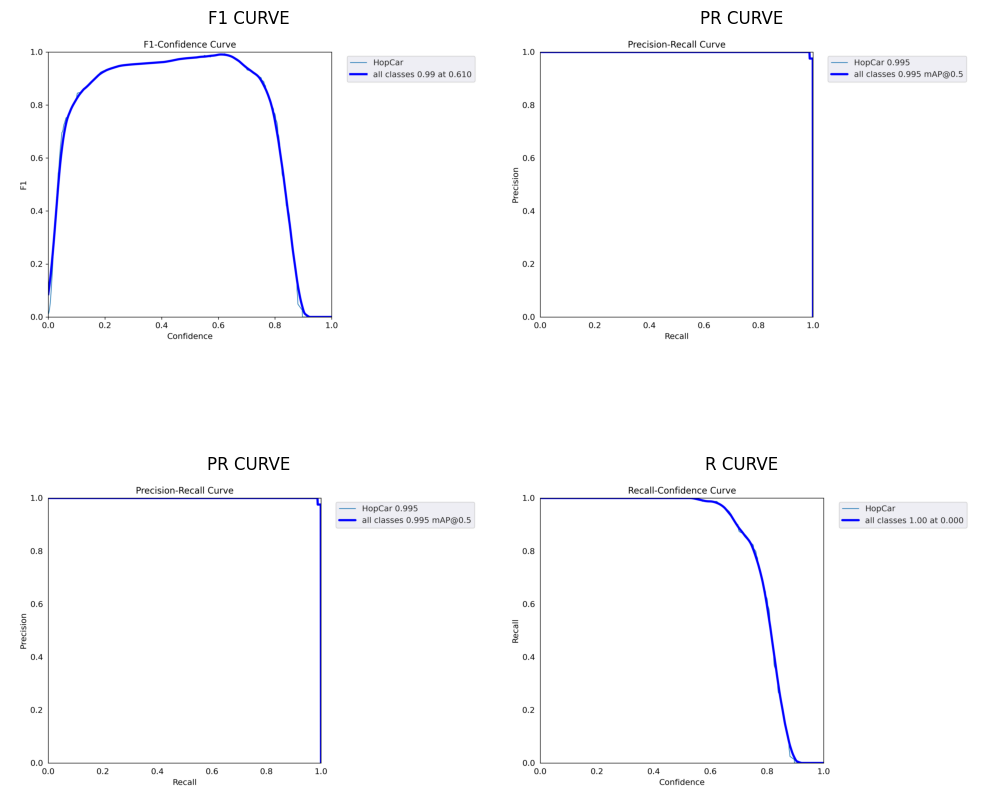

In [37]:
pics = ['F1_curve.png', 'PR_curve.png', 'PR_curve.png', 'R_curve.png']

fig, axs = plt.subplots(2, 2,figsize=(10, 10))

for i, pic in enumerate(pics):
    image_path = f'{PROJECT_NAME}/feature_extraction/{pic}'
    img = mpimg.imread(image_path)
    row = i // 2
    col = i % 2
    axs[row, col].imshow(img)
    axs[row, col].axis('off')
    axs[row, col].set_title(pic[:-4].replace("_", " ").upper())

plt.tight_layout()
plt.show()


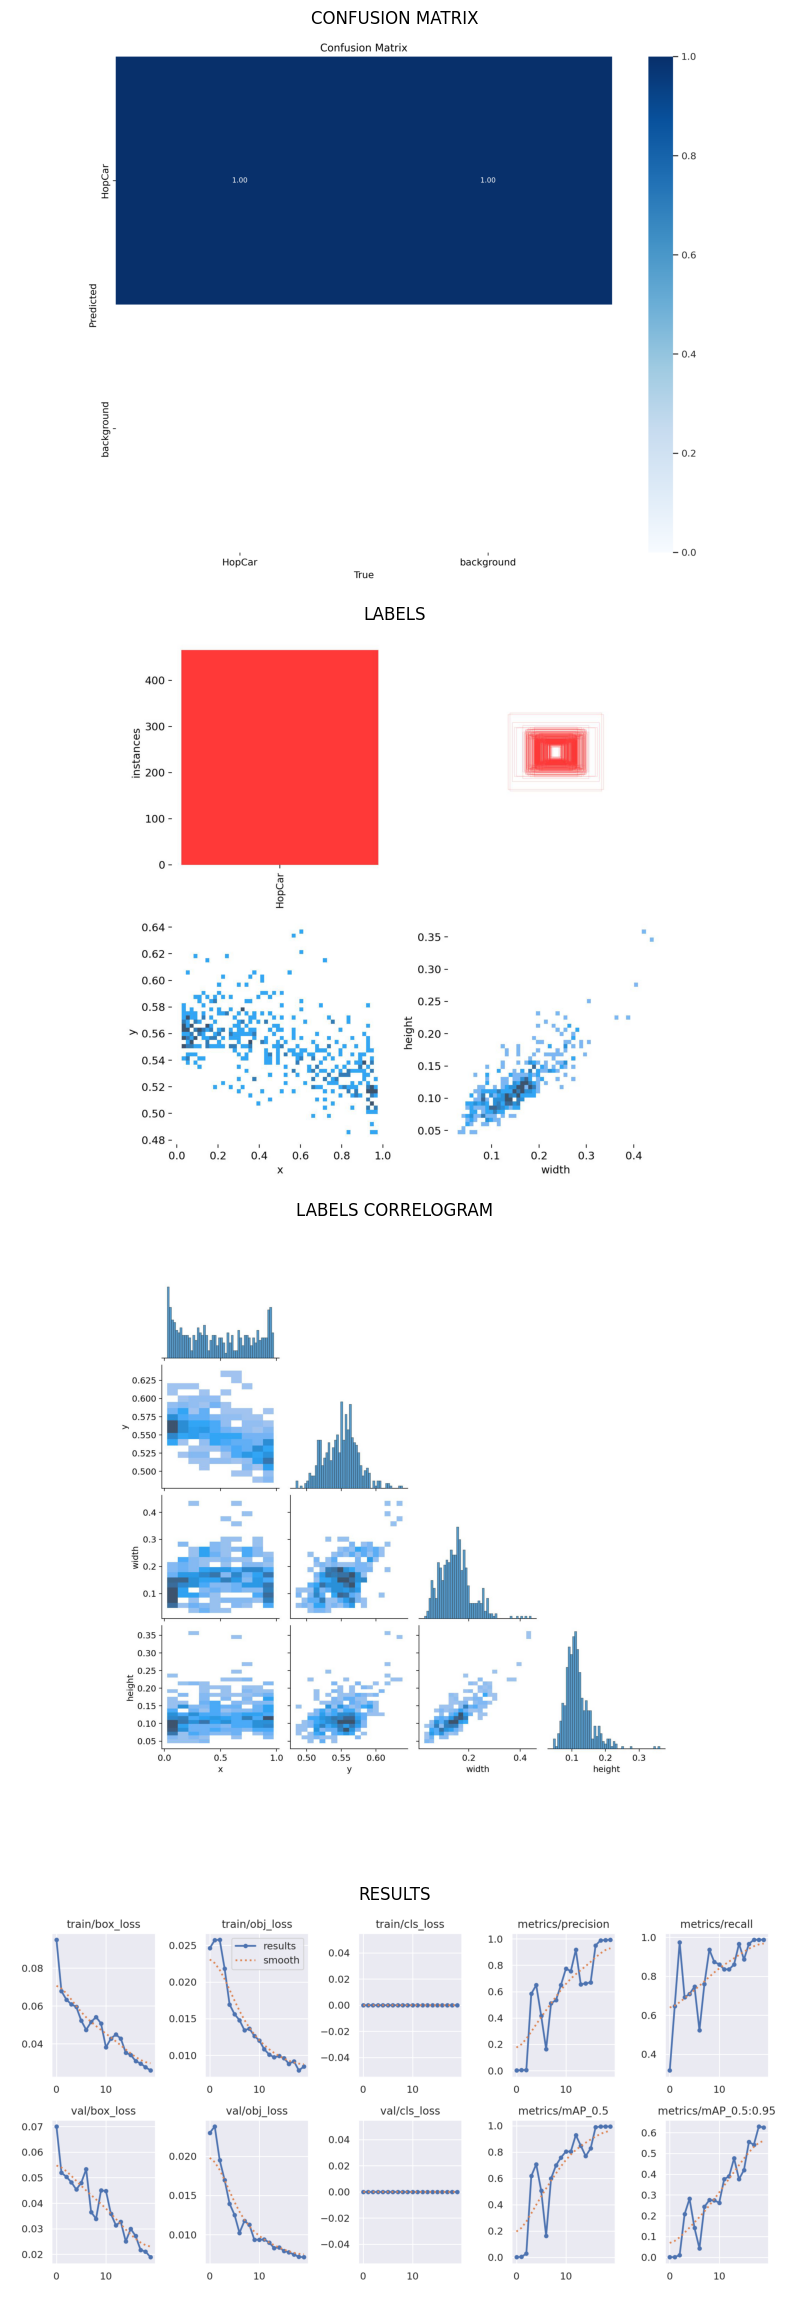

In [38]:
pics = ['confusion_matrix.png', 'labels.jpg', 'labels_correlogram.jpg', 'results.png']

fig, axs = plt.subplots(4, 1, figsize=(8, 24))  # Adjust figsize as desired

for i, pic in enumerate(pics):
    image_path = f'{PROJECT_NAME}/feature_extraction/{pic}'
    img = mpimg.imread(image_path)
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(pic[:-4].replace("_", " ").upper())

plt.tight_layout()
plt.show()

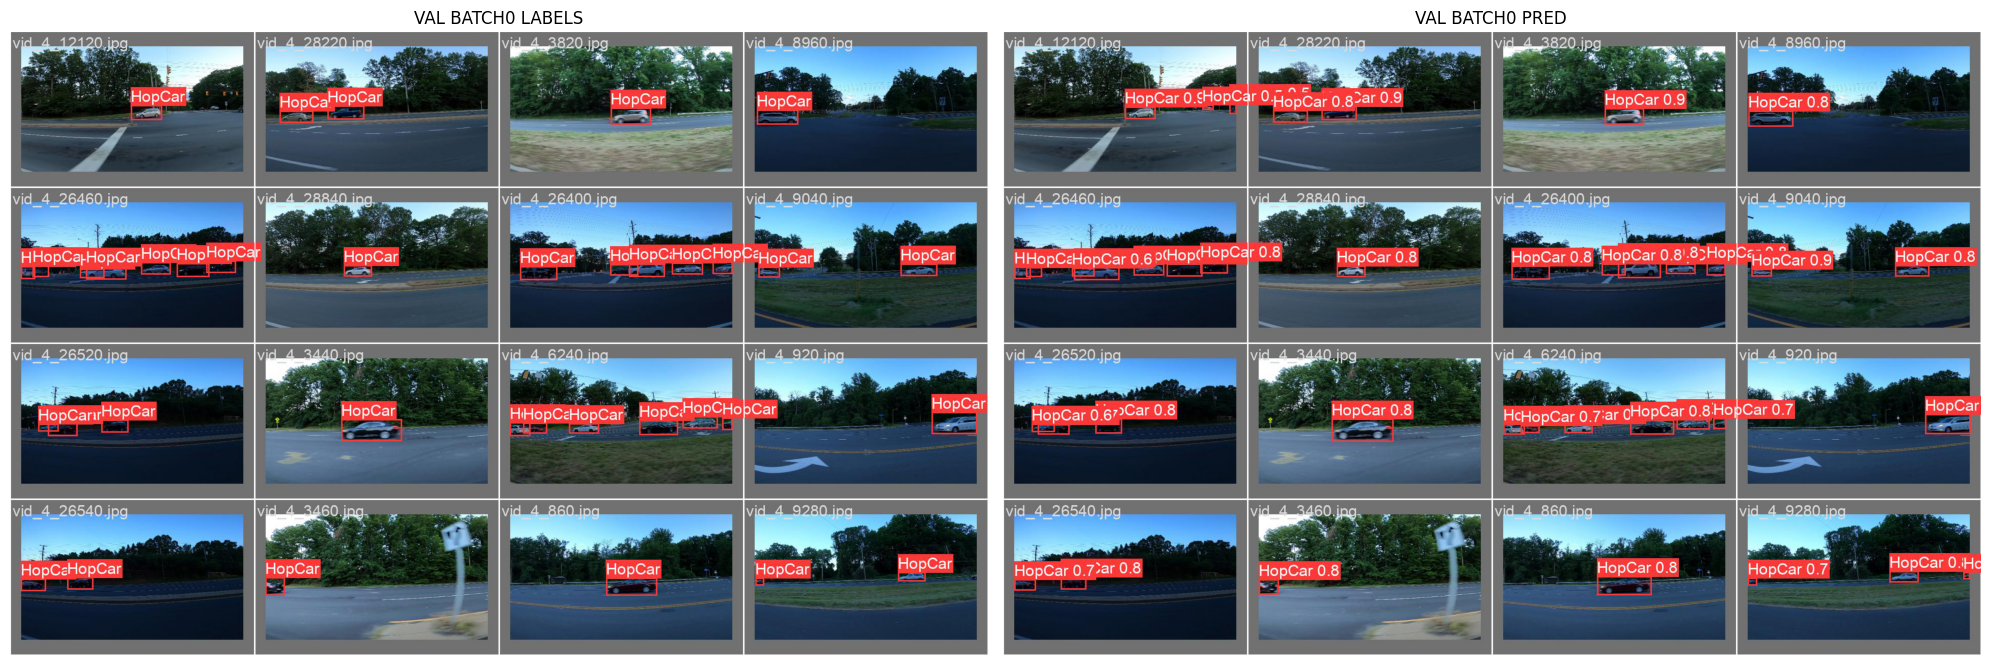

In [39]:
pics = ['val_batch0_labels.jpg', 'val_batch0_pred.jpg']

fig, axs = plt.subplots(1, 2, figsize=(20, 10))  # Adjust figsize as desired

for i, pic in enumerate(pics):
    image_path = f'{PROJECT_NAME}/feature_extraction/{pic}'
    img = mpimg.imread(image_path)
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(pic[:-4].replace("_", " ").upper())

plt.tight_layout()
plt.show()

In [40]:
!python yolov5/detect.py --weights $WEIGHTS_BEST --conf 0.6 --source '/content/tmp/images' --project $PROJECT_NAME --name 'detect_test' --augment --line=3 --save-txt

detect: weights=['yolov5_train/feature_extraction/weights/best.pt'], source=/content/tmp/images, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=True, visualize=False, update=False, project=yolov5_train, name=detect_test, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
Model summary: 276 layers, 35248920 parameters, 0 gradients, 48.9 GFLOPs
image 1/355 /content/tmp/images/vid_4_1000.jpg: 384x640 1 HopCar, 394.2ms
image 2/355 /content/tmp/images/vid_4_10000.jpg: 384x640 1 HopCar, 31.7ms
image 3/355 /content/tmp/images/vid_4_10020.jpg: 384x640 1 HopCar, 31.2ms
image 4/355 /content/tmp/images/vid_4_10040.jpg: 384x640 1 HopCar, 30.7ms
image 

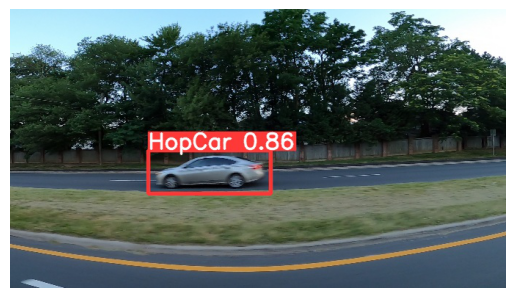

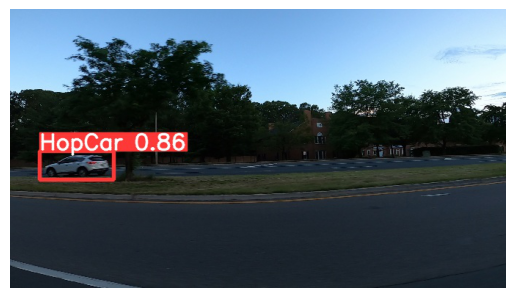

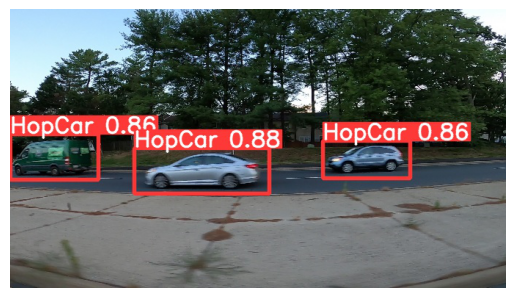

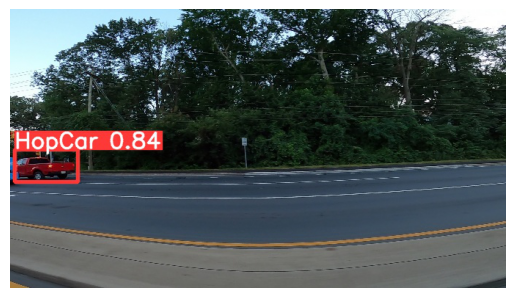

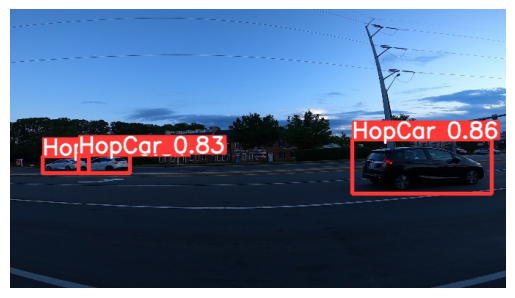

In [41]:
directory = "yolov5_train/detect_test"
jpg_files = [file for file in os.listdir(directory) if file.endswith(".jpg")]
random_files = random.sample(jpg_files, 5)

for file in random_files:
    image_path = os.path.join(directory, file)
    image = mpimg.imread(image_path)
    plt.imshow(image)
    plt.axis("off")
    plt.show()

In [42]:
# Path to the output folder for cropped images
output_folder = 'cropped_images'
os.makedirs(output_folder, exist_ok=True)

# Path to the directory containing the labeled and image images
label_folder = 'yolov5_train/detect_test/labels'
image_folder = "/content/tmp/images"


# Process each labeled image
for label_file in os.listdir(label_folder):
    image_name = label_file[:-4] + ".jpg"
    image_path = os.path.join(image_folder, image_name)
    label_path = os.path.join(label_folder, label_file)
    image = cv2.imread(image_path)
    height, width, _ = image.shape

    # Read the label file
    with open(label_path, "r") as file:
        lines = file.readlines()

    # Process each line in the label file
    for line in lines:
        class_id, x_center, y_center, box_width, box_height = map(float, line.strip().split())

        # Calculate bounding box coordinates
        x_min = int((x_center - box_width / 2) * width)
        y_min = int((y_center - box_height / 2) * height)
        x_max = int((x_center + box_width / 2) * width)
        y_max = int((y_center + box_height / 2) * height)

        # Crop and save the image using the bounding box coordinates
        cropped_img = image[y_min:y_max, x_min:x_max]
        cropped_img_name = f'{image_name[:-4]}_{int(class_id)}.jpg'
        cropped_img_path = os.path.join(output_folder, cropped_img_name)
        cv2.imwrite(cropped_img_path, cropped_img)

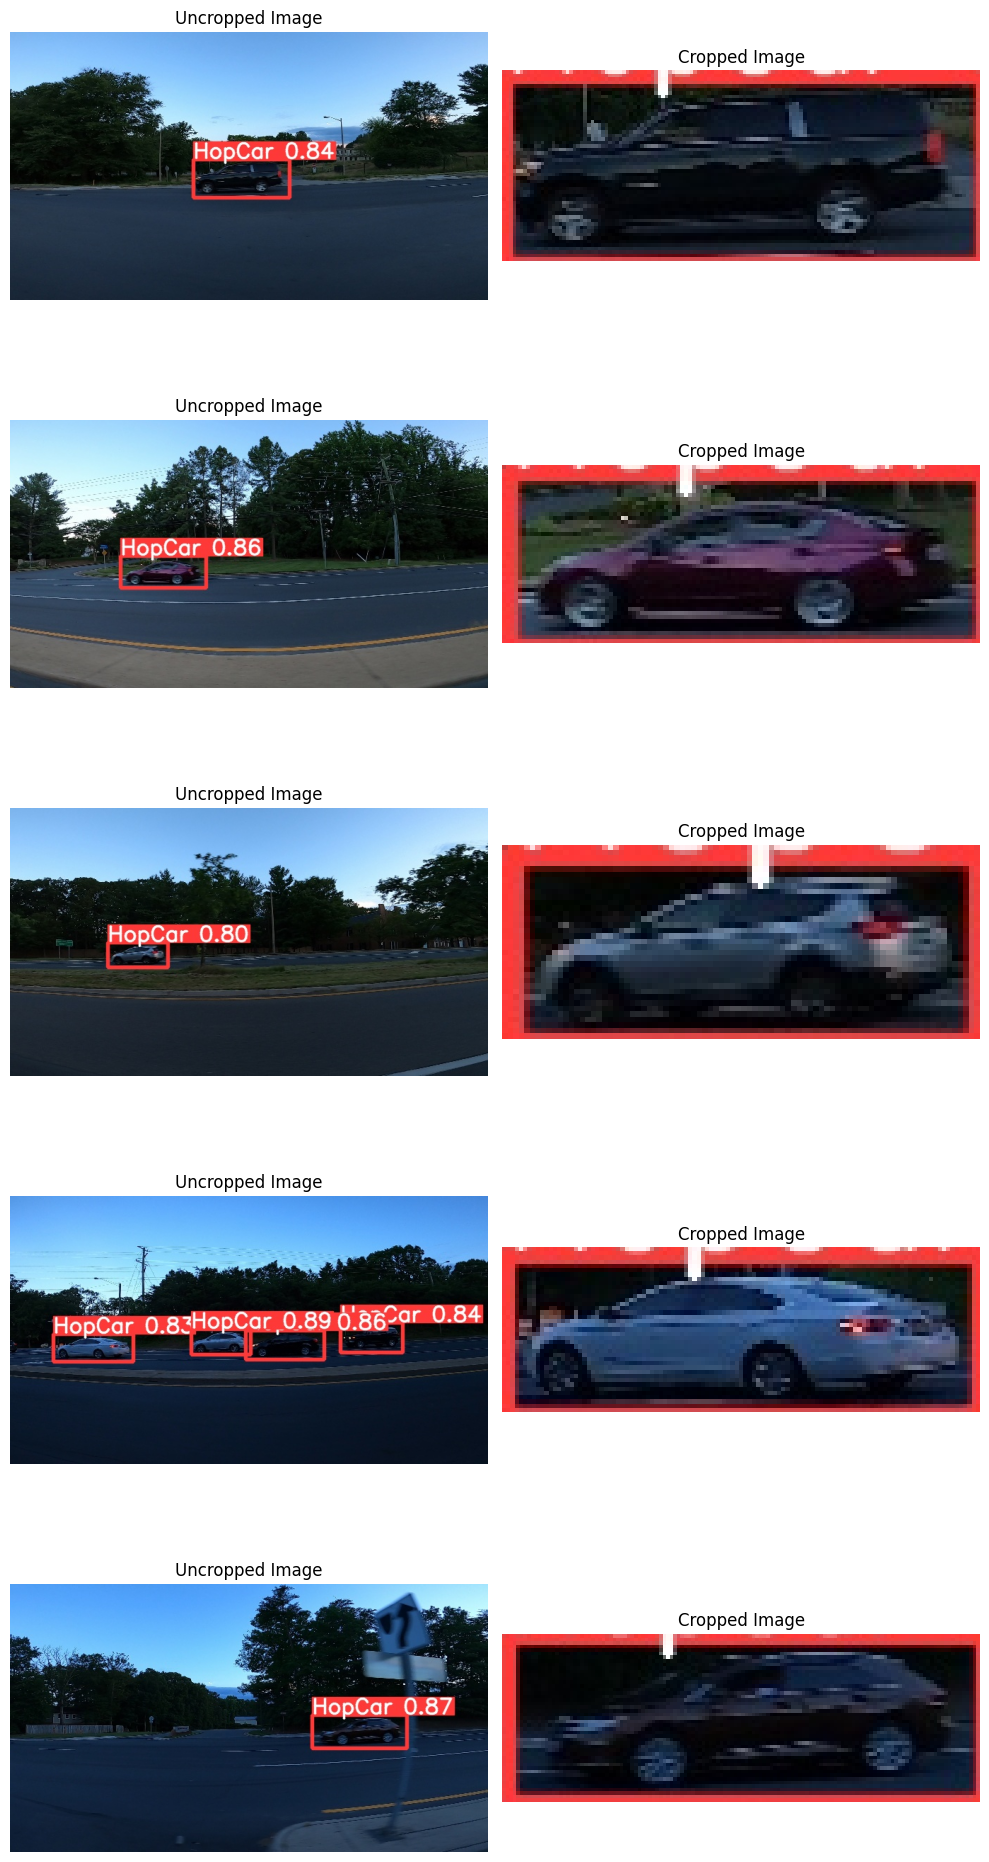

In [43]:


# Path to the output folder for cropped images
output_folder = "cropped_images"
os.makedirs(output_folder, exist_ok=True)

# Path to the directory containing the labeled images
label_folder = "yolov5_train/detect_test/labels"
#image_folder = "/content/tmp/images"
image_folder = 'yolov5_train/detect_test'

# Randomly select 5 images
image_files = os.listdir(label_folder)
random_images = random.sample(image_files, 5)

# Create a figure to display the images
fig, axs = plt.subplots(5, 2, figsize=(10, 20))

# Process each randomly selected image
for i, image_file in enumerate(random_images):
    image_name = image_file[:-4] + ".jpg"
    image_path = os.path.join(image_folder, image_name)
    label_path = os.path.join(label_folder, image_file)
    image = cv2.imread(image_path)
    height, width, _ = image.shape

    # Read the label file
    with open(label_path, "r") as file:
        lines = file.readlines()

    # Process the first bounding box in the label file
    line = lines[0]
    class_id, x_center, y_center, box_width, box_height = map(float, line.strip().split())

    # Calculate bounding box coordinates
    x_min = int((x_center - box_width / 2) * width)
    y_min = int((y_center - box_height / 2) * height)
    x_max = int((x_center + box_width / 2) * width)
    y_max = int((y_center + box_height / 2) * height)

    # Crop the image using the bounding box coordinates
    cropped_img = image[y_min:y_max, x_min:x_max]

    # Display the uncropped image
    axs[i, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[i, 0].axis("off")
    axs[i, 0].set_title("Uncropped Image")

    # Display the cropped image
    axs[i, 1].imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
    axs[i, 1].axis("off")
    axs[i, 1].set_title("Cropped Image")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

bla

## Unet Object Segmentation

In [44]:
im_path = f'{path_main}/carvana-image-masking-png/train_images'
lab_path = f'{path_main}/carvana-image-masking-png/train_masks'


print(f'does im exist: {os.path.exists(im_path)}')
print(f'does lab_path exist: {os.path.exists(lab_path)}')

does im exist: True
does lab_path exist: True


In [45]:
images_path = datapath.joinpath(im_path)
labels_path = datapath.joinpath(lab_path)

In [46]:
images_files = os.listdir(images_path)
images_files_sorted = sorted(images_files)

In [47]:
# iterate over the sorted list and rename each file with an index-based name
for i, file in enumerate(images_files_sorted):
    # generate the new name with an index based on the current position in the sorted list
    new_name = f"image_{i}.jpg"
    # use the os.rename() function to rename the file
    os.rename(os.path.join(images_path, file), os.path.join(images_path, new_name))

In [48]:
labels_files = os.listdir(labels_path)
labels_files_sorted = sorted(labels_files)

In [49]:
# iterate over the sorted list and rename each file with an index-based name
for i, file in enumerate(labels_files_sorted):
    # generate the new name with an index based on the current position in the sorted list
    new_name = f"label_{i}.jpg"
    # use the os.rename() function to rename the file
    os.rename(os.path.join(labels_path, file), os.path.join(labels_path, new_name))

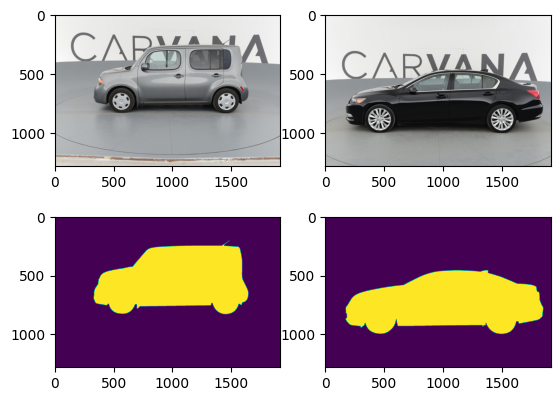

In [50]:
fig, ax = plt.subplots(2,2)
ax[0,0].imshow(skimage.io.imread(images_path.joinpath('image_20.jpg')))
ax[0,1].imshow(skimage.io.imread(images_path.joinpath('image_4.jpg')))
ax[1,0].imshow(skimage.io.imread(labels_path.joinpath('label_20.jpg')))
ax[1,1].imshow(skimage.io.imread(labels_path.joinpath('label_4.jpg')))


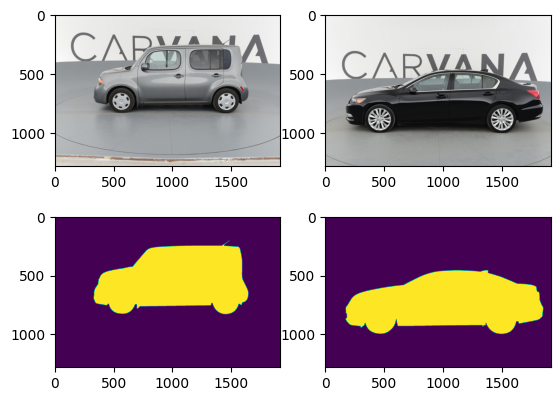

In [51]:
fig, ax = plt.subplots(2,2)
ax[0,0].imshow(skimage.io.imread(images_path.joinpath('image_20.jpg')))
ax[0,1].imshow(skimage.io.imread(images_path.joinpath('image_4.jpg')))
ax[1,0].imshow(skimage.io.imread(labels_path.joinpath('label_20.jpg')))
ax[1,1].imshow(skimage.io.imread(labels_path.joinpath('label_4.jpg')))


In [52]:
im_train = iio.imread(images_path.joinpath('image_20.jpg'))
im_label = iio.imread(labels_path.joinpath('label_20.jpg'))
print(type(im_train))
print(type(im_label))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Histogram of Label Image')

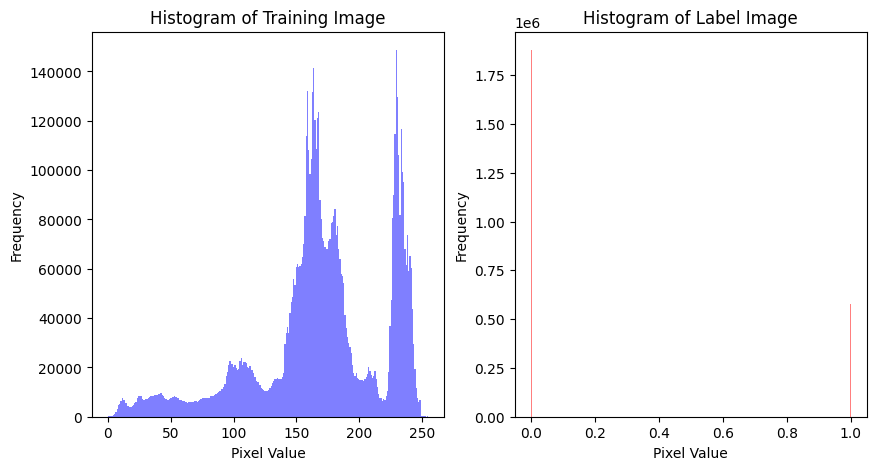

In [53]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))

# Plot the histogram of the training image
ax[0].hist(im_train.flatten(), bins=256, color='b', alpha=0.5)
ax[0].set_xlabel('Pixel Value')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of Training Image')

# Plot the histogram of the label image
ax[1].hist(im_label.flatten(), bins=256, color='r', alpha=0.5)
ax[1].set_xlabel('Pixel Value')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Label Image')

In [54]:
print("The resolution of Training Image is", im_train.shape, "and data type is", im_train.dtype, "since Pixel Values are from 0 to 255")

The resolution of Training Image is (1280, 1918, 3) and data type is uint8 since Pixel Values are from 0 to 255


In [55]:
#import warnings
#warnings.filterwarnings("ignore")

In [56]:


image_height = 160*3 #1280 #160 #640
image_width = 240*3 #1918 #240 #960



import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

# Define the augmentations
transform = A.Compose([
    A.Rotate(limit=40, p=1.0),
    A.Resize(image_height, image_width),
    A.Normalize(
        mean = [0.0,0.0,0.0],
        std = [1.0,1.0,1.0],
    ),
    ToTensorV2()
])


In [57]:
image_height = 160*3 #1280 #160 #640
image_width = 240*3 #1918 #240 #960



import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

# Define the augmentations
transform = A.Compose([
    A.Rotate(limit=40, p=1.0),
    A.Resize(image_height, image_width),
    A.Normalize(
        mean = [0.0,0.0,0.0],
        std = [1.0,1.0,1.0],
    ),
    ToTensorV2()
])


In [58]:
class Segdata(Dataset):
    def __init__(self, im_path, label_path, transforms=None):
        super(Segdata, self).__init__()
        self.im_path = im_path
        self.label_path = label_path
        self.transform = transforms
        self.images = os.listdir(im_path)
        self.labels = os.listdir(label_path)
        
    def __getitem__(self, index):
        

        image_path = self.im_path.joinpath(f'image_{index}.jpg')
        x = np.array(Image.open(image_path).convert("RGB"))

        label_path = self.label_path.joinpath(f'label_{index}.jpg')
        y = np.array(Image.open(label_path).convert("L"))


        y[y == 255.0] = 1.0
        
        if self.transform is not None:          
            
            augmentations = self.transform(image = x, mask = y)
            x = augmentations['image']
            y = augmentations['mask']

            y = y.unsqueeze(0)

            #x = self.transform(x)
            #y = self.transform(y)
  
        return x, y

    def __len__(self):
        return len(self.images)

In [59]:
segdata = Segdata(images_path, labels_path, transform)
train_size = int(0.8 * len(segdata))
valid_size = len(segdata)-train_size

batch_size = 16

train_data, valid_data = random_split(segdata, [train_size, valid_size])


train_loader = DataLoader(train_data, batch_size=batch_size)
validation_loader = DataLoader(valid_data, batch_size=batch_size)

In [60]:
image_test, label_test = segdata[4]

Text(0.5, 1.0, 'Histogram of Label Image')

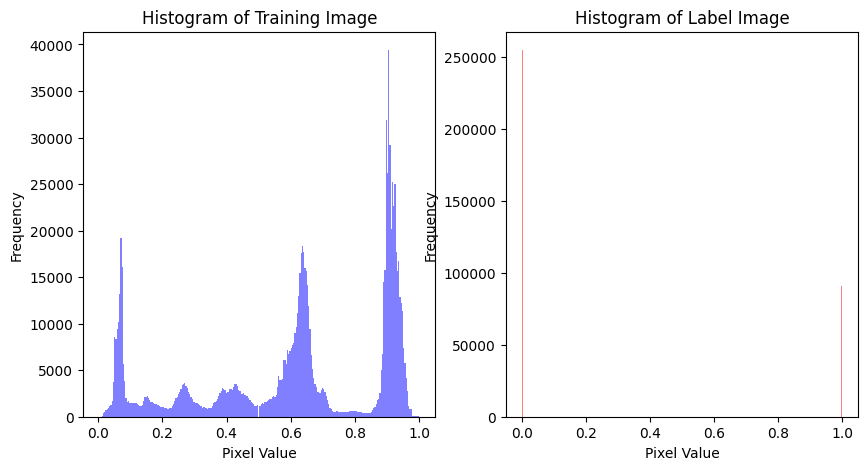

In [61]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))

# Plot the histogram of the training image
ax[0].hist(image_test.flatten(), bins=256, color='b', alpha=0.5)
ax[0].set_xlabel('Pixel Value')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of Training Image')

# Plot the histogram of the label image
ax[1].hist(label_test .flatten(), bins=256, color='r', alpha=0.5)
ax[1].set_xlabel('Pixel Value')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Label Image')

In [62]:
print(image_test.shape)
print(label_test.shape)

torch.Size([3, 480, 720])
torch.Size([1, 480, 720])


In [63]:
print(image_test.permute(1, 2, 0).shape)
print(label_test.permute(1, 2, 0).shape)

torch.Size([480, 720, 3])
torch.Size([480, 720, 1])


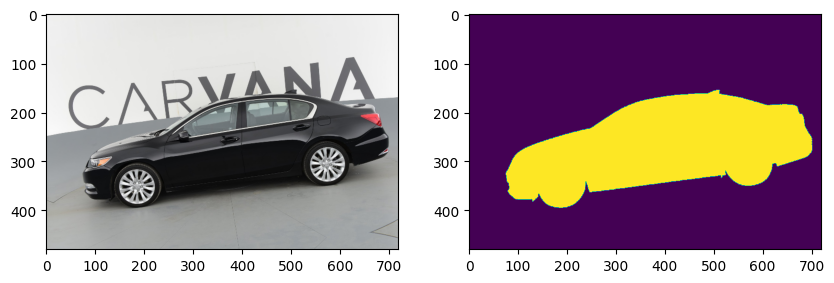

In [64]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))

ax[0].imshow(image_test.permute(1, 2, 0))
ax[1].imshow(label_test.permute(1, 2, 0))

In [65]:
train_loader

In [66]:
im_batch, lab_batch = next(iter(train_loader))

In [67]:
print(im_batch.shape)
print(lab_batch.shape)

torch.Size([16, 3, 480, 720])
torch.Size([16, 1, 480, 720])


Text(0.5, 1.0, 'Histogram of Label Image')

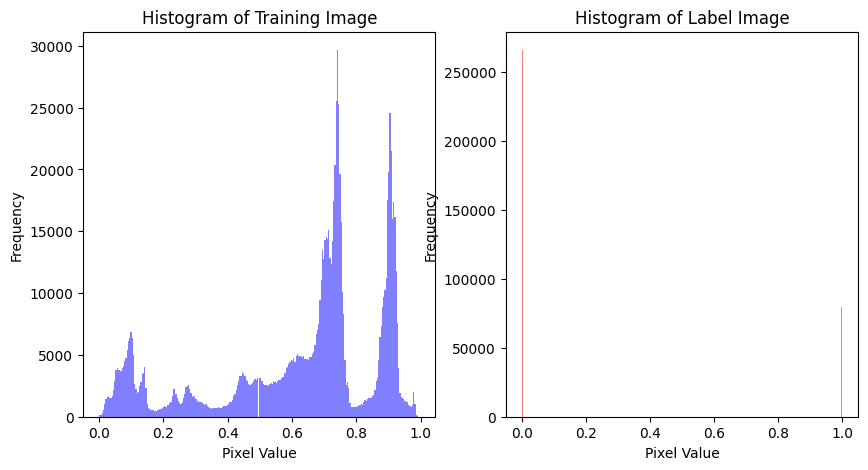

In [68]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))

# Plot the histogram of the training image
ax[0].hist(im_batch[1,:,:,:].flatten(), bins=256, color='b', alpha=0.5)
ax[0].set_xlabel('Pixel Value')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of Training Image')

# Plot the histogram of the label image
ax[1].hist(lab_batch[1,:,:,:].flatten(), bins=256, color='r', alpha=0.5)
ax[1].set_xlabel('Pixel Value')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Label Image')

In [69]:
from IPython.display import Image as IM2
IM2(url='https://github.com/guiwitz/DLImaging/raw/master/illustrations/unet.jpg', width=800)

In [70]:
def dice_loss(output, target):
    smooth = 1e-8  # smoothing factor to avoid division by zero
    output = output.view(-1)
    target = target.view(-1)
    
    intersection = torch.sum(output * target)
    union = torch.sum(output) + torch.sum(target)
    
    dice = (2.0 * intersection + smooth) / (union + smooth)
    loss = 1.0 - dice
    
    return loss

In [71]:
class Unet(pl.LightningModule):
    def __init__(self, learning_rate):
        super(Unet, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.transpose_conv3 = nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=2, padding=0, stride=2)
        self.conv2_t = nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, padding=1)
        self.transpose_conv2 = nn.ConvTranspose2d(in_channels=32, out_channels=16, kernel_size=2, padding=0, stride=2)
        self.conv1_t = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3, padding=1)
        self.conv_final = nn.Conv2d(in_channels=16, out_channels=1, kernel_size=1)

        #self.loss = nn.BCEWithLogitsLoss()
        self.loss = dice_loss
        
        self.learning_rate = learning_rate

    def forward(self, x):
        x1 = F.relu(self.conv1(x))
        x = self.maxpool1(x1)
        x2 = F.relu(self.conv2(x))
        x = self.maxpool2(x2)
        x3 = F.relu(self.conv3(x))
        x2_t = self.transpose_conv3(x3)
        x = torch.cat((x2, x2_t), dim=1)
        x = F.relu(self.conv2_t(x))
        x = self.transpose_conv2(x)
        x = torch.cat((x1, x), dim=1)
        x = F.relu(self.conv1_t(x))
        x = self.conv_final(x)

        return x.sigmoid()

Epoch 1/2: 100%|██████████| 255/255 [06:56<00:00,  1.63s/it, loss=0.24]


Epoch 1/2 - Train Loss: 0.3175 - Validation Loss: 0.2354 - Accuracy: 0.9079 - IoU: 0.3824


Epoch 2/2: 100%|██████████| 255/255 [07:59<00:00,  1.88s/it, loss=0.177]


Epoch 2/2 - Train Loss: 0.2038 - Validation Loss: 0.2100 - Accuracy: 0.9058 - IoU: 0.3955
Elapsed time: 1036.9654695987701 seconds


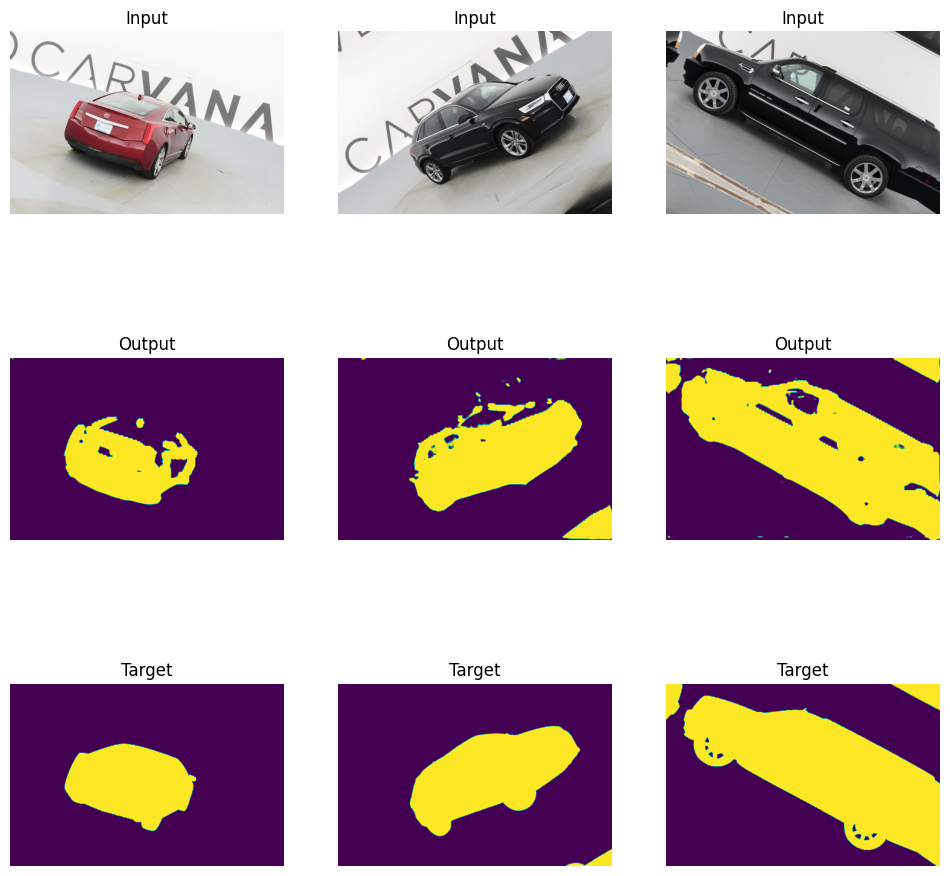

In [72]:
from tqdm import tqdm

if 'unet' in locals():
    del unet


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
unet = Unet(learning_rate=0.001)
unet = unet.to(device)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(valid_data, batch_size=batch_size)

optimizer = torch.optim.Adam(unet.parameters(), lr=0.001)

num_epochs = 2  # Adjust the number of epochs as needed

import time

# Start the timer
start_time = time.time()

train_losses = []
validation_losses = []
accuracies = []
ious = []
jaccards = []

for epoch in range(num_epochs):
    # Training
    unet.train()
    train_loss = 0.0

    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader))
    for batch_idx, (inputs, targets) in progress_bar:
        inputs = inputs.to(device)
        targets = targets.to(device)

        optimizer.zero_grad()

        outputs = unet(inputs)
        loss = unet.loss(outputs, targets)

        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        progress_bar.set_description(f"Epoch {epoch+1}/{num_epochs}")
        progress_bar.set_postfix(loss=loss.item())

    train_loss /= len(train_loader)

    # Validation
    unet.eval()
    validation_loss = 0.0
    accuracy = 0.0
    iou = 0.0
    jaccard = 0.0

    with torch.no_grad():
        for inputs, targets in validation_loader:
            inputs = inputs.to(device)
            targets = targets.to(device)

            outputs = unet(inputs)
            loss = unet.loss(outputs, targets)

            validation_loss += loss.item()

            outputs_binary = (outputs > 0.5).float()

            accuracy += (outputs_binary == targets).float().mean().item()

            intersection = (outputs_binary * targets).sum()
            union = (outputs_binary + targets).sum()
            iou += intersection / (union + 1e-8)

            outputs_prob = torch.softmax(outputs, dim=1)
            outputs_argmax = outputs_prob.argmax(dim=1).float()
            #jaccard += jaccard_score(outputs_binary.view(-1), outputs_argmax.view(-1), average='macro')

        validation_loss /= len(validation_loader)
        accuracy /= len(validation_loader)
        iou /= len(validation_loader)
        #jaccard /= len(validation_loader)
        #jaccards.append(jaccard)

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} - Validation Loss: {validation_loss:.4f}"
          f" - Accuracy: {accuracy:.4f} - IoU: {iou:.4f}")# - Jaccard: {jaccard:.4f}")

    # Append metrics to lists
    train_losses.append(train_loss)
    validation_losses.append(validation_loss)
    accuracies.append(accuracy)
    ious.append(iou)      

    # Save predictions as images for a specific epoch
    if epoch == 0 or (epoch + 1) % 5 == 0:
        unet.eval()
        with torch.no_grad():
            example_inputs, example_targets = next(iter(validation_loader))
            example_inputs = example_inputs.to(device)
            example_targets = example_targets.to(device)

            example_outputs = unet(example_inputs)
            example_outputs = example_outputs.cpu().detach().numpy()
            example_targets = example_targets.cpu().detach().numpy()

            # Save example predictions as images
            fig, axes = plt.subplots(3, 3, figsize=(12, 12))
            for i, (ax_input, ax_output, ax_target) in enumerate(zip(axes[0], axes[1], axes[2])):
              ax_input.imshow(example_inputs[i].cpu().permute(1, 2, 0))
              ax_input.set_title("Input")
              ax_input.axis("off")

              ax_output.imshow(example_outputs[i][0])
              ax_output.set_title("Output")
              ax_output.axis("off")

              ax_target.imshow(example_targets[i][0])
              ax_target.set_title("Target")
              ax_target.axis("off")

          #plt.tight_layout()
          #plt.savefig(f"Colab Notebooks/Thesis/epochs/predictions_epoch_{epoch+1}.png")
          #plt.close(fig)




model_file = f'unet_{num_epochs}epoch_{image_width}x{image_height}.pt'  

if not os.path.exists(f'{path_main}/models'):
  os.makedirs(f'{path_main}/models')

torch.save(unet, datapath.joinpath(f'{path_main}/models/{model_file}'))


# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Elapsed time: {elapsed_time} seconds")


In [73]:
# Move tensors to CPU memory
ious_cpu = [iou.cpu().numpy() for iou in ious]

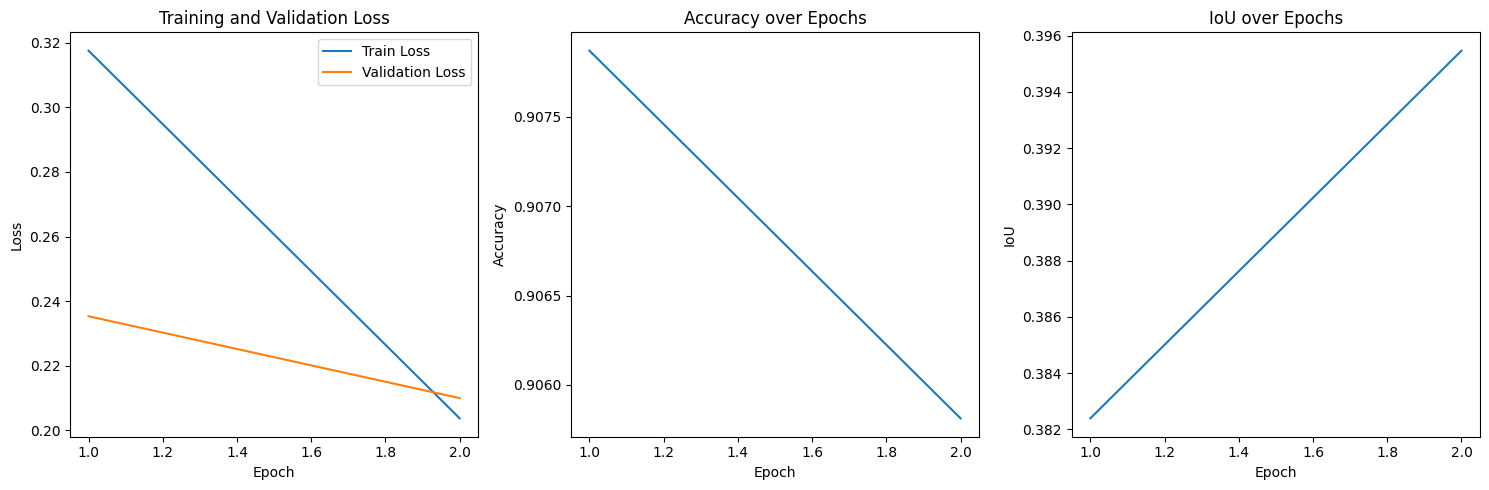

In [74]:
# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot training and validation loss
axs[0].plot(range(1, num_epochs+1), train_losses, label='Train Loss')
axs[0].plot(range(1, num_epochs+1), validation_losses, label='Validation Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training and Validation Loss')
axs[0].legend()

# Plot accuracy
axs[1].plot(range(1, num_epochs+1), accuracies, label='Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Accuracy over Epochs')

# Plot IoU
axs[2].plot(range(1, num_epochs+1), ious_cpu, label='IoU')
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('IoU')
axs[2].set_title('IoU over Epochs')

plt.tight_layout()
plt.show()

In [75]:
unet = torch.load(datapath.joinpath(f'{path_main}/models/unet_{num_epochs}epoch_{image_width}x{image_height}.pt'))

In [76]:
val_iter = iter(validation_loader)
test_batch, test_label = next(val_iter)

In [77]:
#pred = unet(test_batch)

# Move the model to the device
unet = unet.to(device)

# Move the test batch to the device
test_batch = test_batch.to(device)

# Make the prediction
pred = unet(test_batch)

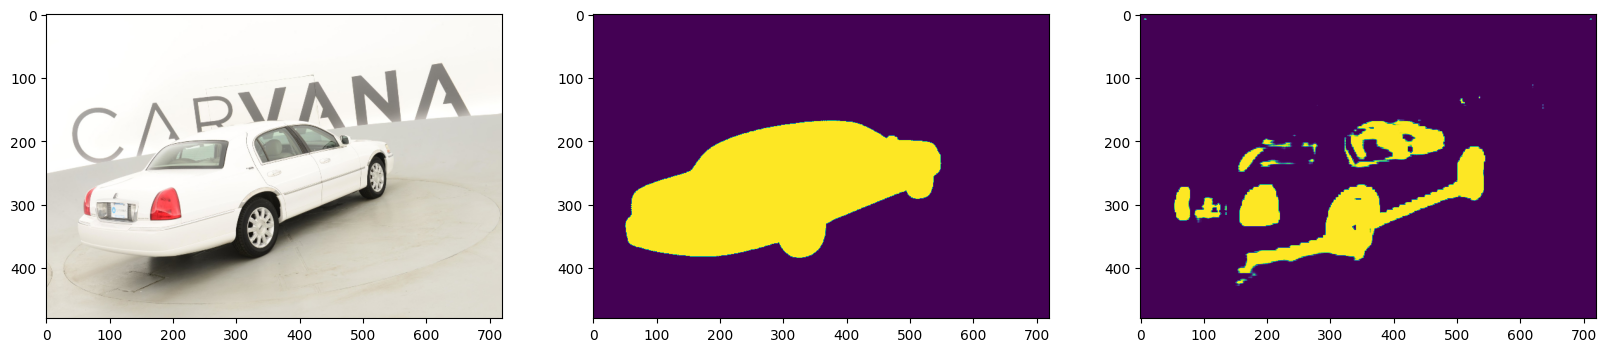

In [78]:
sample_nr = 10

pred_conv = pred[sample_nr]
pred_conv = pred_conv.detach().cpu().numpy()
pred_conv = pred_conv.reshape(pred_conv.shape[1:])

test_conv = test_batch[sample_nr]
test_conv = test_conv.permute(1, 2, 0).cpu().numpy()

label_conv = test_label[sample_nr]
label_conv = label_conv.detach().cpu().numpy()
label_conv = label_conv.reshape(label_conv.shape[1:])

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(test_conv)
ax[1].imshow(label_conv)
ax[2].imshow(pred_conv)

Text(0.5, 1.0, 'Histogram of Predicted Label')

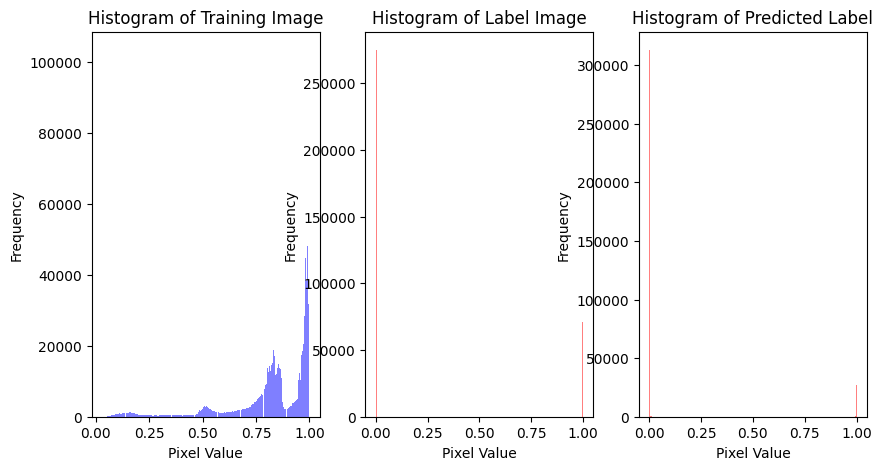

In [79]:
fig, ax = plt.subplots(1,3, figsize=(10, 5))

# Plot the histogram of the training image
ax[0].hist(test_conv.flatten(), bins=256, color='b', alpha=0.5)
ax[0].set_xlabel('Pixel Value')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of Training Image')

# Plot the histogram of the label image
ax[1].hist(label_conv.flatten(), bins=256, color='r', alpha=0.5)
ax[1].set_xlabel('Pixel Value')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Label Image')

# Plot the histogram of the label image
ax[2].hist(pred_conv.flatten(), bins=256, color='r', alpha=0.5)
ax[2].set_xlabel('Pixel Value')
ax[2].set_ylabel('Frequency')
ax[2].set_title('Histogram of Predicted Label')

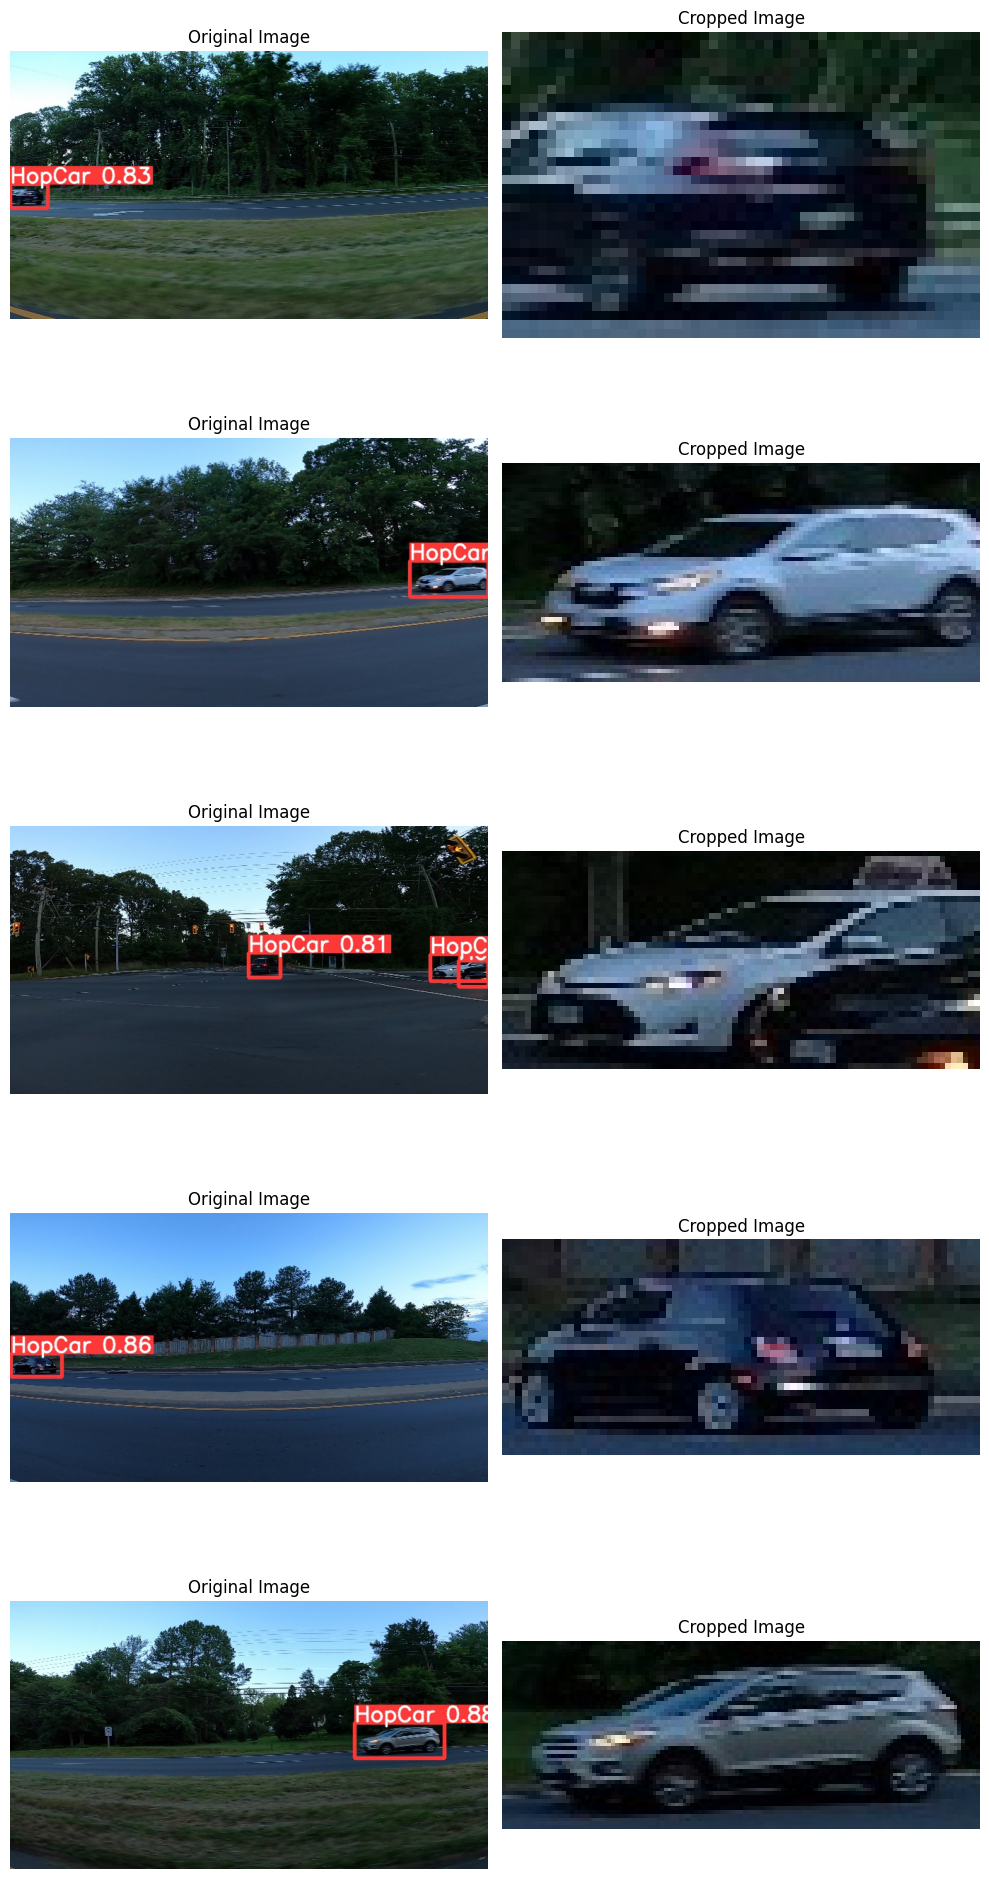

In [80]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Path to the directory containing the original images
image_folder = "yolov5_train/detect_test"

# Path to the directory containing the cropped images
output_folder = "cropped_images"

# Randomly select 5 image pairs
image_files = os.listdir(image_folder)
random_images = random.sample(image_files, 5)

# Create a figure to display the image pairs
fig, axs = plt.subplots(5, 2, figsize=(10, 20))

# Process each randomly selected image pair
for i, image_file in enumerate(random_images):
    image_path = os.path.join(image_folder, image_file)
    cropped_image_name = image_file[:-4] + "_0.jpg"
    cropped_image_path = os.path.join(output_folder, cropped_image_name)

    # Load the original image
    original_image = Image.open(image_path)

    # Load and display the cropped image if it exists
    if os.path.exists(cropped_image_path):
        cropped_image = Image.open(cropped_image_path)

        # Display the original image
        axs[i, 0].imshow(original_image)
        axs[i, 0].axis("off")
        axs[i, 0].set_title("Original Image")

        # Display the cropped image
        axs[i, 1].imshow(cropped_image)
        axs[i, 1].axis("off")
        axs[i, 1].set_title("Cropped Image")
    else:
        axs[i, 0].axis("off")
        axs[i, 0].set_title("Original Image (Not Found)")
        axs[i, 1].axis("off")
        axs[i, 1].set_title("Cropped Image (Not Found)")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

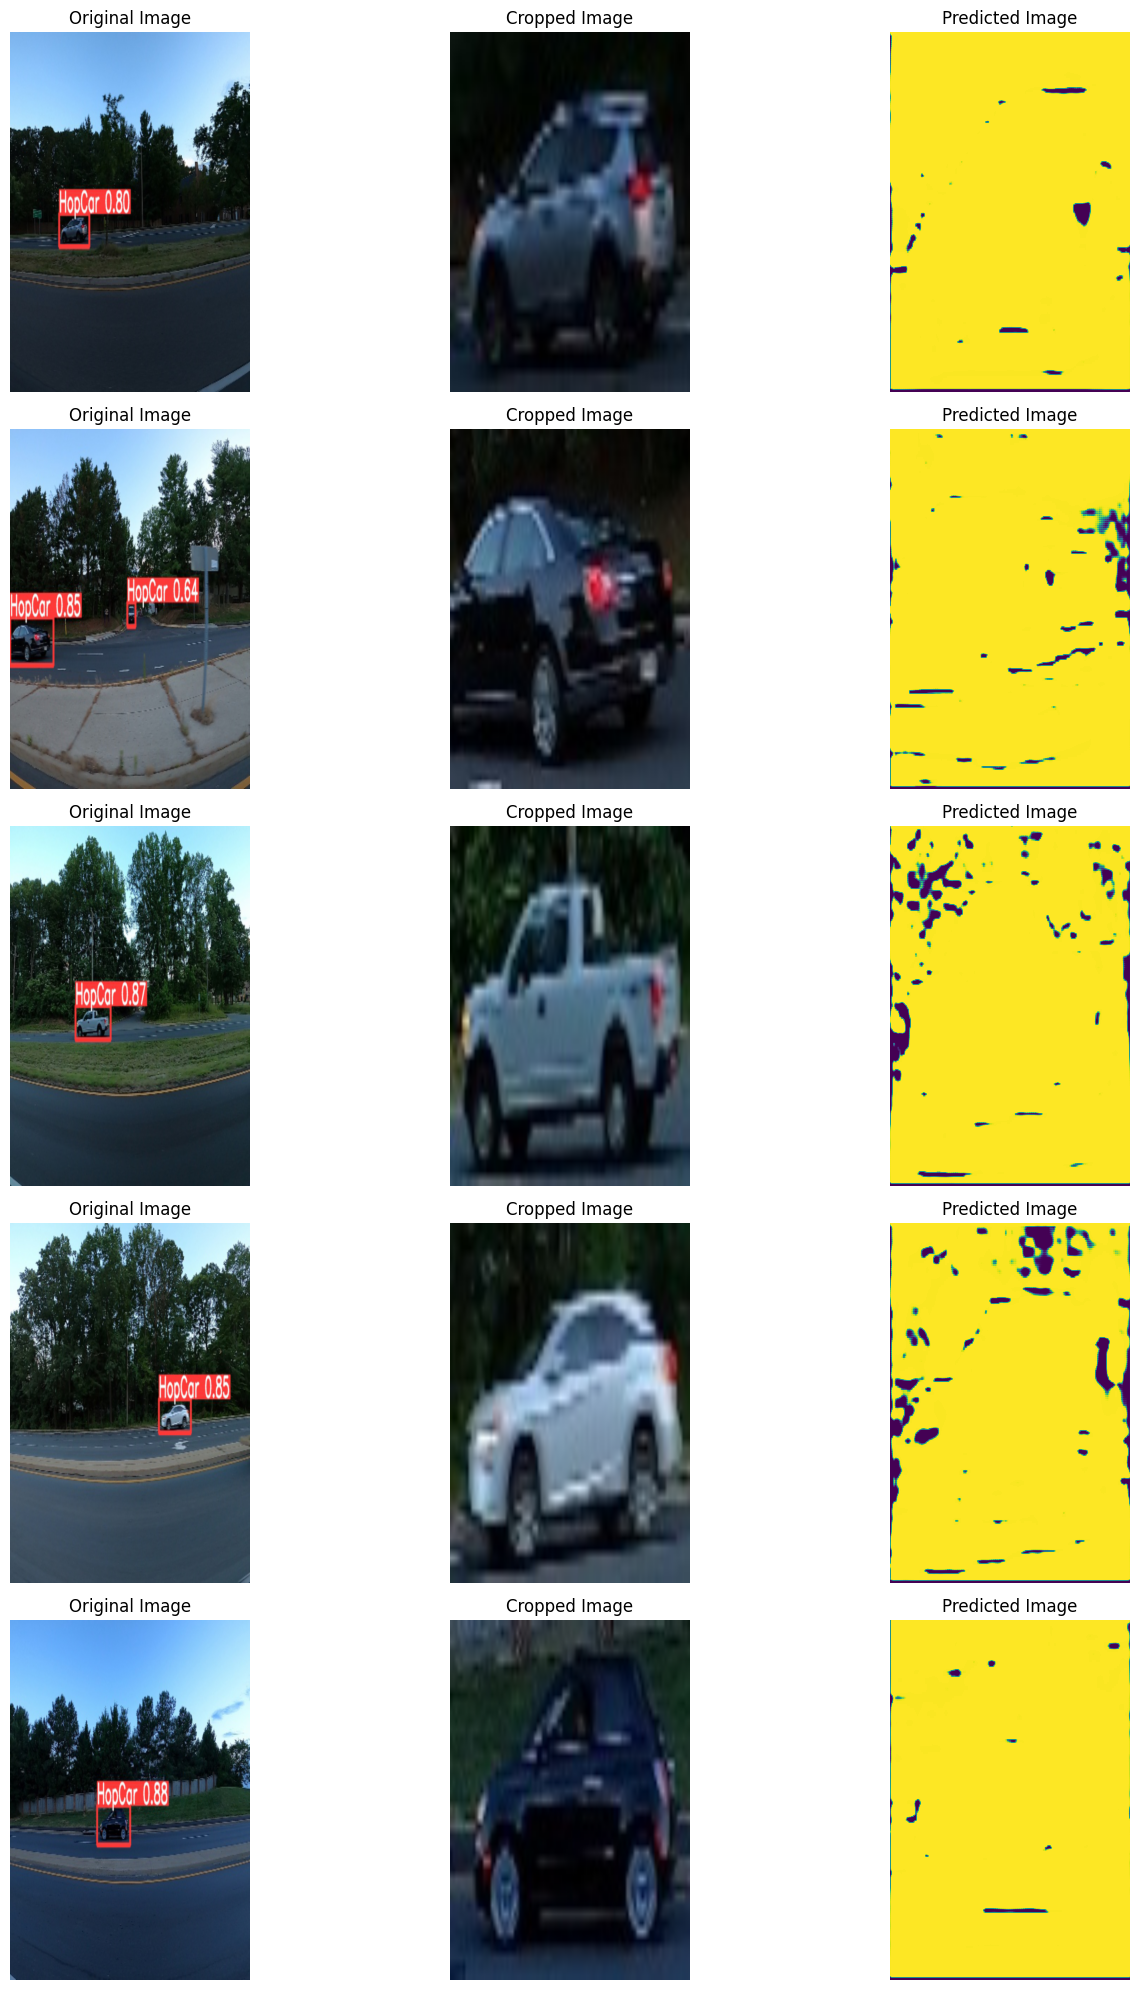

In [97]:

from torchvision.transforms import ToTensor, Resize, ToPILImage

# Path to the directory containing the original images
image_folder = "yolov5_train/detect_test"

# Path to the directory containing the cropped images
output_folder = "cropped_images"

# Path to the UNet model
unet_model_path = f'{path_main}/models/unet_{num_epochs}epoch_{image_width}x{image_height}.pt'

# Randomly select 5 image pairs
image_files = os.listdir(image_folder)
random_images = random.sample(image_files, 5)

# Load the UNet model
unet = Unet(learning_rate=0.001)  # Replace with the appropriate UNet model class
unet = torch.load(unet_model_path)
unet = unet.to(device)
unet.eval()


desired_width = image_width
desired_height = image_height


# Create a figure to display the image pairs
fig, axs = plt.subplots(5, 3, figsize=(15, 20))  # Update to 3 columns

# Process each randomly selected image pair
for i, image_file in enumerate(random_images):
    image_path = os.path.join(image_folder, image_file)
    cropped_image_name = image_file[:-4] + "_0.jpg"
    cropped_image_path = os.path.join(output_folder, cropped_image_name)

    # Load the original image
    original_image = Image.open(image_path)
    original_image = Resize((desired_width, desired_height))(original_image)
    original_tensor = ToTensor()(original_image).unsqueeze(0).to(device)

    # Load and display the cropped image if it exists
    if os.path.exists(cropped_image_path):
        cropped_image = Image.open(cropped_image_path)
        cropped_image = Resize((desired_width, desired_height))(cropped_image)
        cropped_tensor = ToTensor()(cropped_image).unsqueeze(0).to(device)

        # Make the UNet prediction on the cropped image
        with torch.no_grad():
            cropped_pred = unet(cropped_tensor)

        # Convert the predicted tensor to an image
        cropped_pred_image = ToPILImage()(cropped_pred.squeeze(0).cpu())

        # Display the original image, cropped image, and predicted image
        axs[i, 0].imshow(original_image)
        axs[i, 0].axis("off")
        axs[i, 0].set_title("Original Image")

        axs[i, 1].imshow(cropped_image)
        axs[i, 1].axis("off")
        axs[i, 1].set_title("Cropped Image")

        axs[i, 2].imshow(cropped_pred_image)
        axs[i, 2].axis("off")
        axs[i, 2].set_title("Predicted Image")
    else:
        axs[i, 0].axis("off")
        axs[i, 0].set_title("Original Image (Not Found)")
        axs[i, 1].axis("off")
        axs[i, 1].set_title("Cropped Image (Not Found)")

# Remove empty subplots if the number of random images is less than 5
for j in range(len(random_images), 5):
    axs[j, 0].axis("off")
    axs[j, 1].axis("off")
    axs[j, 2].axis("off")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()